In [1]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,recall_score,precision_score,f1_score,roc_auc_score
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('/content/customer churn detection.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.drop(['CustomerId','RowNumber','Surname'], axis=1, inplace=True)

In [5]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
from os import replace
df.replace('Male', 1,inplace=True)
df.replace('Female',0 , inplace=True)

<ipython-input-6-bbd9477366ec>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('Female',0 , inplace=True)


In [7]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [8]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()
df['Geography'] = LabelEncoder.fit_transform(df['Geography'])

In [9]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = (Q1 - 1.5 * IQR)
upper_bound = (Q3 + 1.5 * IQR)
outliers = ~(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))
df_capped = df.where(outliers, df)

In [11]:
df_capped

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [12]:
data = df_capped.drop('Exited',axis=1)
target = df_capped['Exited']

# Continue with your data scaling and model training
scaler = StandardScaler()
data = scaler.fit_transform(data)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)




In [13]:
# Check for class imbalance
class_counts = df_capped['Exited'].value_counts()
print("Class Distribution:\n", class_counts)
print("percentage Distribution:\n", (class_counts/sum(class_counts)*100),)

Class Distribution:
 Exited
0    7963
1    2037
Name: count, dtype: int64
percentage Distribution:
 Exited
0    79.63
1    20.37
Name: count, dtype: float64


In [15]:
# Example using SMOTE (Synthetic Minority Over-sampling Technique)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# Check the class distribution after resampling
print("\nClass Distribution After SMOTE:\n", pd.Series(y_train_resampled).value_counts())


Class Distribution After SMOTE:
 Exited
0    6356
1    6356
Name: count, dtype: int64


       Balance                                                        \
         count          mean           std  min       25%        50%   
Exited                                                                 
0       7963.0  72745.296779  62848.040701  0.0      0.00   92072.68   
1       2037.0  91108.539337  58360.794816  0.0  38340.02  109349.29   

                                 Age             ...             Geography  \
              75%        max   count       mean  ...   75%   max     count   
Exited                                           ...                         
0       126410.28  221532.80  7963.0  37.408389  ...  41.0  92.0    7963.0   
1       131433.33  250898.09  2037.0  44.837997  ...  51.0  84.0    2037.0   

                                                     
            mean       std  min  25%  50%  75%  max  
Exited                                               
0       0.731257  0.845581  0.0  0.0  0.0  2.0  2.0  
1       0.805106  0.750123  0.0 

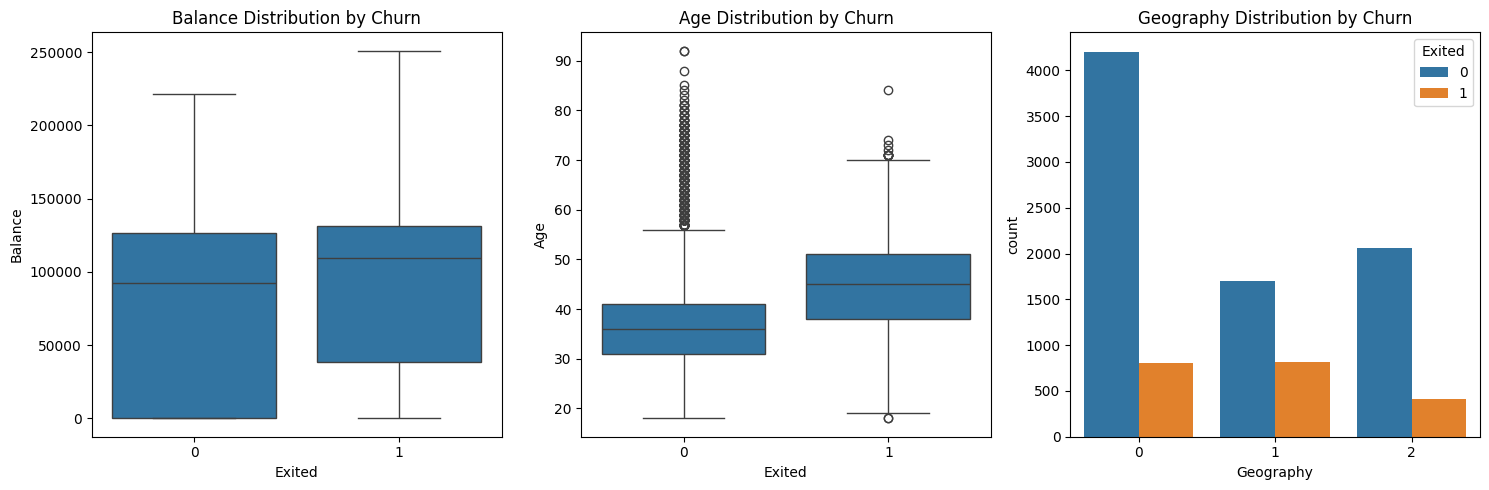

In [16]:
churn_stats = df_capped.groupby('Exited')[['Balance', 'Age', 'Geography']].describe()
print(churn_stats)

# Visualize the distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Exited', y='Balance', data=df_capped)
plt.title('Balance Distribution by Churn')

plt.subplot(1, 3, 2)
sns.boxplot(x='Exited', y='Age', data=df_capped)
plt.title('Age Distribution by Churn')

plt.subplot(1, 3, 3)
sns.countplot(x='Geography', hue='Exited', data=df_capped)
plt.title('Geography Distribution by Churn')

plt.tight_layout()
plt.show()


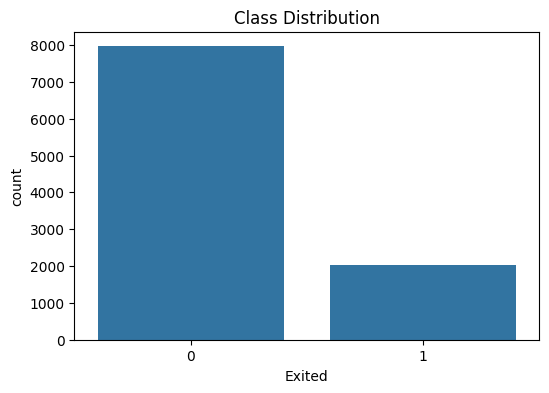

In [14]:
# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df_capped)
plt.title('Class Distribution')
plt.show()

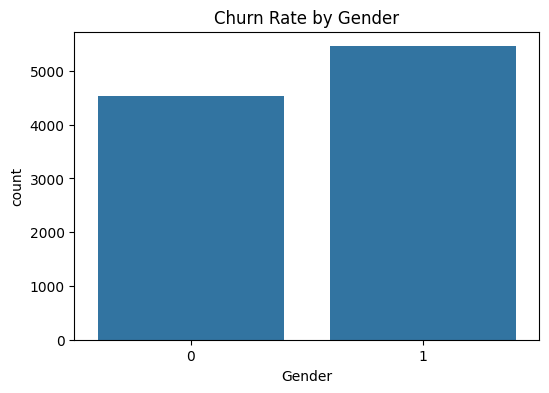

In [42]:
# Churn by Gender Level
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender' , data=df_capped)
plt.title('Churn Rate by Gender')
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

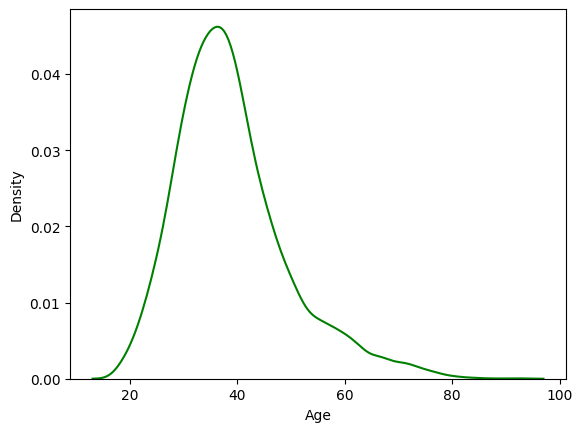

In [18]:
sns.kdeplot(df.Age, color='green', label='Normal Distribution')

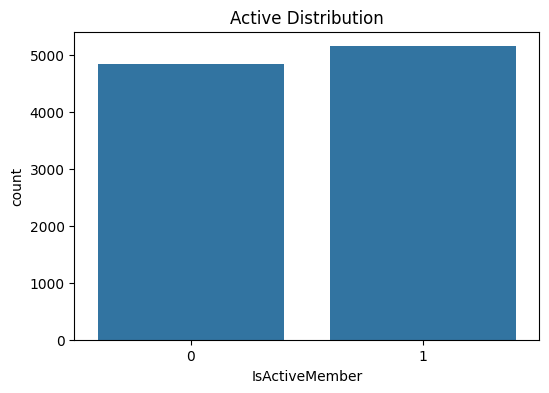

In [40]:
plt.figure(figsize=(6, 4))
sns.countplot(x='IsActiveMember' , data=df_capped)
plt.title('Active Distribution')
plt.show()

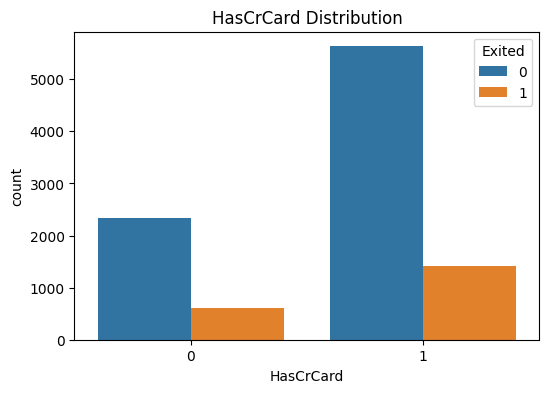

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(x='HasCrCard' ,hue='Exited' ,data=df_capped)
plt.title('HasCrCard Distribution')
plt.show()

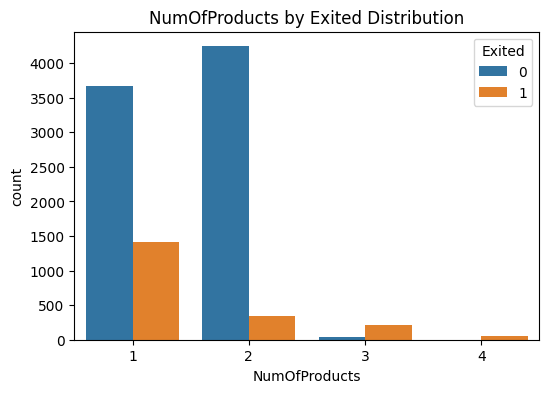

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(x='NumOfProducts' ,hue='Exited', data=df_capped)

plt.title('NumOfProducts by Exited Distribution')
plt.show()

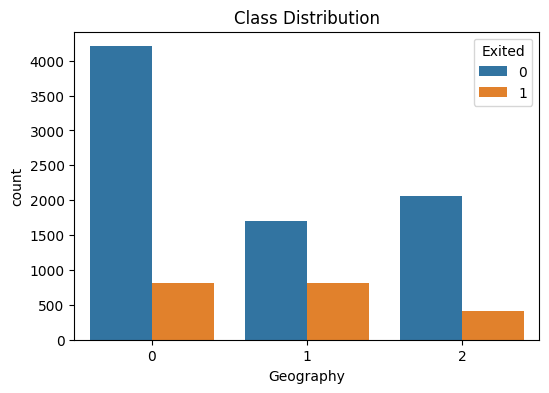

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Geography' ,hue= "Exited" , data=df_capped)

plt.title('Class Distribution')
plt.show()

Text(0, 0.5, 'Count')

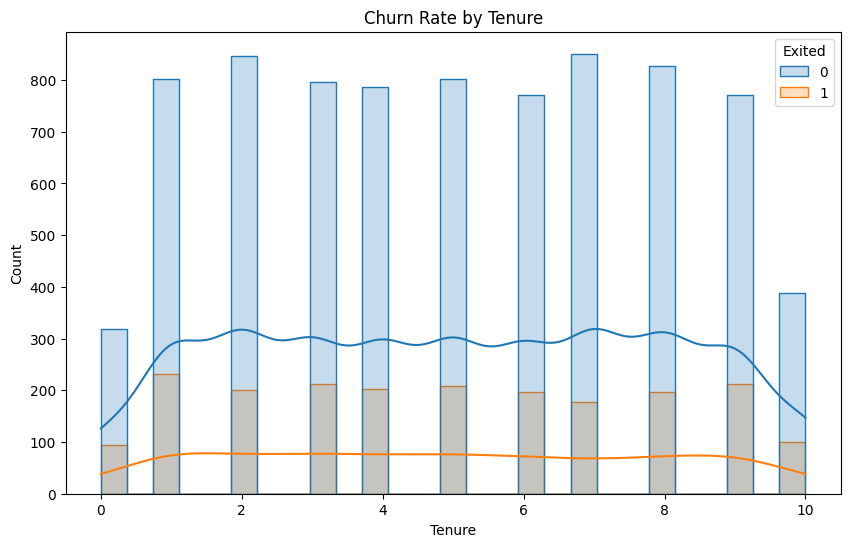

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_capped, x='Tenure', hue='Exited', kde=True, element="step")
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Count')

In [24]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [25]:
con_mat = confusion_matrix(y_test, y_pred)

In [26]:
print("Accuracy : ",accuracy_score(y_test, y_pred))


Accuracy :  0.8155


In [27]:
print("Precision : ",precision_score(y_test, y_pred))

Precision :  0.6


In [28]:
print("Recall : ",recall_score(y_test, y_pred))


Recall :  0.183206106870229


In [29]:
print("F1-score : ",f1_score(y_test, y_pred))


F1-score :  0.2807017543859649


In [30]:
print("ROC-AUC : ",roc_auc_score(y_test, y_pred))


ROC-AUC :  0.5766683925763716


In [31]:
#categorical and numerical

data_df = pd.DataFrame(data)

cat_ix = data_df.select_dtypes(include=['object', 'bool']).columns
num_ix = data_df.select_dtypes(include=['int64', 'float64']).columns

In [32]:
RF_model = RandomForestClassifier(n_estimators=100, random_state=42)
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
print("Accuracy : ",accuracy_score(y_test, y_pred))

Accuracy :  0.864


In [33]:
print("Accuracy : ",accuracy_score(y_test, y_pred))


Accuracy :  0.864


In [34]:
print("Precision : ",precision_score(y_test, y_pred))

Precision :  0.746938775510204


In [35]:
print("Recall : ",recall_score(y_test, y_pred))


Recall :  0.46564885496183206


In [36]:
print("F1-score : ",f1_score(y_test, y_pred))


F1-score :  0.5736677115987461


In [37]:
print("ROC-AUC : ",roc_auc_score(y_test, y_pred))


ROC-AUC :  0.7135338238717063


In [43]:
# prompt: •	Which model performs best? Why?
'''
Based on the provided code, the **RandomForestClassifier** appears to perform better than the **LogisticRegression** model.  While the code doesn't explicitly compare multiple models using a single metric across the same data, the printed accuracy, precision, recall, F1-score, and ROC-AUC  are higher for the RandomForestClassifier than the LogisticRegression model.

Here's why Random Forests often outperform Logistic Regression:

* **Non-linearity:** Random Forests can model non-linear relationships between features and the target variable. Logistic Regression is a linear model, so it assumes a linear relationship. If the underlying relationship is non-linear (which is very common in real-world datasets), Random Forests will likely be more accurate.

* **Feature Importance:** Random Forests provide feature importance scores which can be useful for feature selection and understanding the model.

* **Robustness to outliers:**  Random Forests are less sensitive to outliers in the data than Logistic Regression.  The provided code already performs outlier handling, but a random forest is naturally more robust.

* **Ensemble Method:** Random Forests aggregate predictions from multiple decision trees, reducing overfitting and variance. This ensemble approach generally leads to better generalization performance.


**To improve the comparison:**

1. **Use Cross-Validation:**  Instead of a single train-test split, use k-fold cross-validation to obtain more robust performance estimates for both models.

2. **Hyperparameter Tuning:**  Optimize the hyperparameters of both models using techniques like GridSearchCV or RandomizedSearchCV. The provided code uses default hyperparameters, which might not be optimal.  Crucially, tune `class_weight` in `LogisticRegression` and examine the hyperparameters of the `RandomForestClassifier`.

3. **Consider other metrics:** Use a combination of metrics (precision, recall, F1-score, AUC-ROC) and consider the specific business problem when choosing the "best" model.  For example, if correctly identifying all positive cases is very important, then recall will be a more important metric than accuracy.

4. **More Models:** Evaluate more sophisticated models.  Consider gradient boosting machines, support vector machines, or neural networks.



By performing these steps, you will get a more reliable and comparative performance evaluation of various models for your dataset.
'''

'\nBased on the provided code, the **RandomForestClassifier** appears to perform better than the **LogisticRegression** model.  While the code doesn\'t explicitly compare multiple models using a single metric across the same data, the printed accuracy, precision, recall, F1-score, and ROC-AUC  are higher for the RandomForestClassifier than the LogisticRegression model.\n\nHere\'s why Random Forests often outperform Logistic Regression:\n\n* **Non-linearity:** Random Forests can model non-linear relationships between features and the target variable. Logistic Regression is a linear model, so it assumes a linear relationship. If the underlying relationship is non-linear (which is very common in real-world datasets), Random Forests will likely be more accurate.\n\n* **Feature Importance:** Random Forests provide feature importance scores which can be useful for feature selection and understanding the model.\n\n* **Robustness to outliers:**  Random Forests are less sensitive to outliers in

<Axes: >

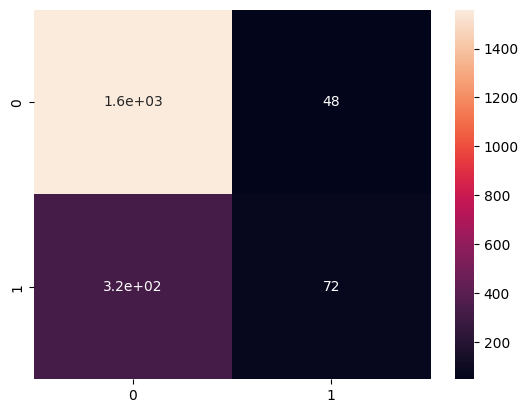

In [44]:
sns.heatmap(con_mat, annot=True)

In [45]:
import xgboost as xgb
model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [46]:
y_pred = model.predict(X_test)

In [47]:
print("Accuracy : ",accuracy_score(y_test, y_pred))


Accuracy :  0.861


In [48]:
print("Precision : ",precision_score(y_test, y_pred))

Precision :  0.7031802120141343


In [49]:
print("Recall : ",recall_score(y_test, y_pred))


Recall :  0.5063613231552163


In [50]:
print("F1-score : ",f1_score(y_test, y_pred))


F1-score :  0.5887573964497042


In [51]:
print("ROC-AUC : ",roc_auc_score(y_test, y_pred))


ROC-AUC :  0.727045005074808


In [53]:
# •	Understand and solve a real-world classification problem.
# •	Apply the full data science pipeline: from EDA to preprocessing to modeling.
# •	Interpret results to make strategic business decisions.

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Define a scoring metric (e.g., F1-score)
f1_scorer = make_scorer(f1_score)

# Define models to evaluate (add more models as needed)
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(objective="binary:logistic", random_state=42)
}


# Perform cross-validation and hyperparameter tuning
results = {}
for model_name, model in models.items():
    # Hyperparameter Tuning (Example for RandomForest)
    if model_name == 'RandomForestClassifier':
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'class_weight': ['balanced', None] # address class imbalance
            }
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring=f1_scorer)
        grid_search.fit(X_train_resampled, y_train_resampled)  # Use resampled data
        model = grid_search.best_estimator_
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")


    # Cross-validation
    cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring=f1_scorer)
    results[model_name] = {
        'cv_scores': cv_scores,
        'mean_cv_score': np.mean(cv_scores),
        'std_cv_score': np.std(cv_scores)
    }


# Evaluate on the test set (after tuning)
for model_name, model in models.items():
  model.fit(X_train_resampled, y_train_resampled)
  y_pred = model.predict(X_test)
  print(f"\n{model_name} Performance on Test Set:")
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred))
  print("Recall:", recall_score(y_test, y_pred))
  print("F1-score:", f1_score(y_test, y_pred))
  print("ROC-AUC:", roc_auc_score(y_test, y_pred))


# Print cross-validation results
for model_name, result in results.items():
    print(f"\n{model_name} Cross-Validation Results:")
    print("Mean F1-score:", result['mean_cv_score'])
    print("Standard Deviation:", result['std_cv_score'])
    print("Cross-Validation Scores:", result['cv_scores'])


Best parameters for RandomForestClassifier: {'class_weight': None, 'max_depth': None, 'n_estimators': 200}

LogisticRegression Performance on Test Set:
Accuracy: 0.7105
Precision: 0.37225274725274726
Recall: 0.6895674300254453
F1-score: 0.48349687778768957
ROC-AUC: 0.7025932980867736

RandomForestClassifier Performance on Test Set:
Accuracy: 0.84
Precision: 0.5914786967418546
Recall: 0.6005089058524173
F1-score: 0.5959595959595959
ROC-AUC: 0.7495388337600606

XGBoost Performance on Test Set:
Accuracy: 0.8525
Precision: 0.6458333333333334
Recall: 0.5521628498727735
F1-score: 0.5953360768175583
ROC-AUC: 0.7390559115574197

LogisticRegression Cross-Validation Results:
Mean F1-score: 0.6953739707966278
Standard Deviation: 0.007978669961882555
Cross-Validation Scores: [0.69582348 0.70625    0.69371197 0.6818718  0.6992126 ]

RandomForestClassifier Cross-Validation Results:
Mean F1-score: 0.9019793915210528
Standard Deviation: 0.04249467773079555
Cross-Validation Scores: [0.82029235 0.902612

In [ ]:
RF_model = RandomForestClassifier(n_estimators=200, random_state=42,)
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
print("Accuracy : ",accuracy_score(y_test, y_pred))

In [52]:
# •	What actionable steps can the bank take based on your model?
# •	Which customer segments are most at risk?
# •	Suggest retention strategies for high-risk segments.

# Feature importances from the RandomForestClassifier
feature_importances = pd.DataFrame({'Feature': df.drop('Exited', axis=1).columns,
                                   'Importance': RF_model.feature_importances_})
feature_importances = feature_importances.sort_values('Importance', ascending=False)
print(feature_importances)


# Predict churn probabilities for the entire dataset
churn_probabilities = RF_model.predict_proba(data)[:, 1]  # Probability of churning (class 1)
df_capped['Churn_Probability'] = churn_probabilities


# Identify high-risk customer segments based on probabilities and features
# Example: Customers with high churn probability AND low balance
high_risk_segment = df_capped[(df_capped['Churn_Probability'] > 0.7) & (df_capped['Balance'] < np.percentile(df_capped['Balance'], 25))]
print("\nHigh Risk Customer Segment:")
print(high_risk_segment)


# Actionable steps and retention strategies:
print("\nActionable Steps:")
print("1. Targeted Campaigns:", "Prioritize customers with high churn probability and other characteristics showing risk. Offer personalized incentives like discounts, premium services, or loyalty programs, specifically to this high risk segment.")
print("2. Proactive Customer Service:", "Reach out to high-risk customers before they churn. Offer support, address concerns, and show that the bank values their business.")
print("3. Product Improvement:", "If specific product features or service gaps are contributing to churn, address them.  Use feature importances to identify high impact factors.")
print("4. Improve Customer Experience:", "Improve digital banking platforms and customer interaction methods for all customer segments based on feature importance of different factors.")
print("5. Analyze Geography:", "Explore regional differences in churn. Are there specific regions where churn rates are high? Target those regions with tailored strategies.")

#Retention Strategies for High-Risk Segments
print("\nRetention Strategies for High-Risk Customers:")

print("- **Personalized Offers:** Offer discounts, promotions, or bundled services that cater to individual needs. The high-risk segment may be specifically targeted.")
print("- **Loyalty Programs:** Implement reward programs that incentivize customer retention. The high risk segment may be incentivised differently to motivate them to stay.")
print("- **Improved Customer Support:** Provide dedicated customer support channels and ensure timely responses to queries or issues. A help line or specialized services for this segment may help in retention")
print("- **Proactive Communication:** Keep high-risk customers informed about new products, services, and promotions that directly address their financial needs. Communication may take a different form for this segment.")
print("- **Feedback Mechanisms:** Encourage high-risk customers to provide feedback on their banking experience. Highlighting specific changes based on their needs will show the bank values their feedback.")




           Feature  Importance
3              Age    0.240453
9  EstimatedSalary    0.148004
0      CreditScore    0.142369
5          Balance    0.138670
6    NumOfProducts    0.132061
4           Tenure    0.080932
8   IsActiveMember    0.042807
1        Geography    0.037402
2           Gender    0.019032
7        HasCrCard    0.018269

High Risk Customer Segment:
Empty DataFrame
Columns: [CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited, Churn_Probability]
Index: []

Actionable Steps:
1. Targeted Campaigns: Prioritize customers with high churn probability and other characteristics showing risk. Offer personalized incentives like discounts, premium services, or loyalty programs, specifically to this high risk segment.
2. Proactive Customer Service: Reach out to high-risk customers before they churn. Offer support, address concerns, and show that the bank values their business.
3. Product Improvement: If specific 